In [2]:
from PIL import Image, ImageDraw
import numpy as np
from pgpelib import PGPE
import multiprocessing as mp
from tqdm.notebook import tqdm

In [3]:
TARGET_IMAGE = "./index.png"

In [7]:
def draw_triangles(params, imsize=(256,256)):
    params_shaped = params.reshape((-1, 10))
    
    im = Image.new("RGB", imsize[::-1], color=(255,255,255))
    draw = ImageDraw.Draw(im, "RGBA")
    
    for tri in range(params_shaped.shape[0]):
        t = params_shaped[tri, :]
        # x,y ,x,y ,x,y ,r,g,b,a
        coords = t[0:6]
        xys = []
        for i in range(3):
            xys += [(coords[i*2]*imsize[0], coords[i*2 +1]*imsize[1])]
        
        draw.polygon(xy=xys, fill=(int(255*t[6]), int(255*t[7]), int(255*t[8]), int(25.5*t[9])))
    
    return im
    
def triangle_diff(params):
    target = np.array(Image.open(TARGET_IMAGE))[:, :, :3]/255
    out = np.array(draw_triangles(params, imsize=target.shape[:2]))/255
    return -((target - out)**2).mean()

In [14]:
NUM_SHAPES = 200
pgpe = PGPE(
    solution_length=10*NUM_SHAPES,
    popsize=50,
    center_init=0.5*np.ones((1,10*NUM_SHAPES)),
    optimizer='clipup',
    optimizer_config={'max_speed': 0.15},
)

  0%|          | 0/2000 [00:00<?, ?it/s]

0 -0.34861994701525056


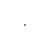

100 -0.25889263762399073


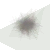

200 -0.058757275245418426


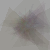

300 -0.025012176665385112


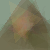

400 -0.016726236111751887


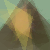

500 -0.014321472351659622


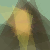

600 -0.012673410413943353


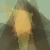

700 -0.011495009768037934


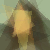

800 -0.010818097175445343


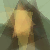

900 -0.010076378503139818


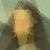

1000 -0.009524658067409972


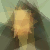

1100 -0.008714951077790592


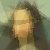

1200 -0.008031565720876587


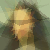

1300 -0.007639160599769319


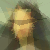

1400 -0.007213363447392029


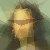

1500 -0.00682580372933487


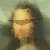

1600 -0.006490876762783544


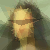

1700 -0.00616536074074074


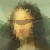

1800 -0.005879085264641803


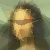

1900 -0.005600945218505702


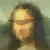

In [15]:
f = []
with mp.Pool(processes=mp.cpu_count()) as p:
    for gen in tqdm(range(2000)):
        sln = pgpe.ask()

        # Calculate Fitness
        fitness = p.map(triangle_diff, sln)

        pgpe.tell(fitness)
        f += [np.mean(fitness)]
        if gen % 100 == 0:
            print(gen, f[-1])
            target = np.array(Image.open(TARGET_IMAGE))[:, :, :3]/255
            display(draw_triangles(pgpe.center, imsize=(int(target.shape[0]*0.25), int(target.shape[1]*0.25))))

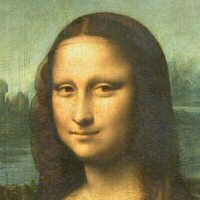

In [16]:
Image.open("./index.png")

In [17]:
im_final = draw_triangles(pgpe.center, imsize=target.shape[:2])

In [18]:
im_final.save("./final.png")

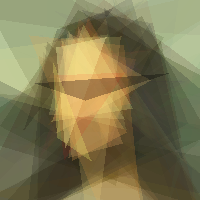

In [19]:
display(im_final)